<h1> <center> SUPER SALES DATA ANALYSIS (STORYTELLING & VISUALIZATION)

<h2> <center> Analyse sales data of Super Store mart and identify opportunities to boost business growth

<img src="https://github.com/raikanwalrai/Tableau/blob/main/IMAGE_2.jpg?raw=1" alt="Drawing" style="width: 200px;"/>

<h2> BACKGROUND

Super Store is a small retail business located in the United States. They sell Furniture, Office  Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices. The data set contains sales, profit and geographical information of Super Store. Our task is to analyze the sales data and identify weak areas and opportunities for Super Store to boost business growth. The Super Store dataset (US Superstore dataset : https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P1-SuperStoreUS-2015.xlsx) contains data on order details of customers for orders of a superstore in the US. Such datasets are huge, but we need to focus mainly on the required column names (attributes) - this includes the state, region, order date, shipping date, product ordered etc. Create a dashboard that analyzes customer complaints and respond the following questions using data visualization in a tool of your choice Tableau or Jupyter Notebook


<h2> BUSINESS CHALLENGES

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- Question 1: What is the overall sales trend?
- Question 2: Which are the Most Selling Products? Which are the Top 10 products by sales?
- Question 3: Which is the most Preferred Ship Mode?
- Question 4: Which Category is Best Selling and Most Profitable?
- Question 5: What are the Best Selling and Most Profitable Sub-Category? Which is the Top Selling Sub-Category?
- Question 6: Which Customer Segment is Most Profitable?
- Question 7: Which Region is the Most Profitable?
- Question 8: Which Country has the Highest Number of Sales?
- Question 9: Adavnced Questions (Not In Scope)

<h2> MOTIVES

___

<h3> Who is Reading this Analysis?

We assume that the Super Store is a family business and is owned by 1 or 2 owners who are very invested in their business.
Owners are likely not people who are expert in reading charts or interpreting statistical analysis, so our analysis will be in layman terms and easy to understand.

<h3> Preparing the Environment

We will import the required libraries and read in the data set.
Pandas — Data manipulation
Matplotlib and Seaborn — Data visualisation

<h3> IMPORTING REQUIRED LIBRARIES

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive

# Mount Google Drive
#drive.mount('/00_00_COLA')
drive.mount('/00_00_COLA')

Mounted at /00_00_COLA


<h3> IMPORTING THE DATASET

In [3]:
# Importing dataset # Read in data in CSV format
# superstore_df = pd.read_excel('superstore_sales.xlsx')
# Importing dataset
superstore_df = pd.read_excel('/00_00_COLA/MyDrive/00_00_COLA/superstore_sales.xlsx')


<H3> DATA AUDIT / Exploration

You can’t make your data work for you until you know what data you’re talking about. To get a quick idea of what the data looks like, we can call the head function on the data frame. By default, this returns the top five rows, but it can take in a parameter of how many rows to return.Let’s have a look at the data using df.head() and df.tail() function.

In [4]:
# First five rows of the dataset # Preview first 5 rows of data set
superstore_df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [ ]:
superstore_df.head(1).T

,0
order_id,AG-2011-2040
order_date,2011-01-01 00:00:00
ship_date,2011-01-06 00:00:00
ship_mode,Standard Class
customer_name,Toby Braunhardt
segment,Consumer
state,Constantine
country,Algeria
market,Africa
region,Africa


In [ ]:
# Last five rows of the dataset # Preview last 5 rows of data set
superstore_df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


You can easily tell that there is a mix of categorical, geographical and numerical variables.

Each row represents an order of an item and the corresponding quantity, sales, discount and profit. There is also the mode of shipment, customer segment and geographical aspects.

Next, we will use the df.shape() and df.info() to get more information.

In [ ]:
# Shape of the dataset
superstore_df.shape

(51290, 21)

There are 51290 rows including header and 21 columns. Data type is correct and matches the corresponding values.

In [ ]:
# Columns present in the dataset
superstore_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

This looks a lot like an Excel spreadsheet, doesn’t it? Under the hood, the data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

In [ ]:
# A concise summary of the dataset # Summarised information of data set
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

Now we can do further analysis on our data to answer our questions. Before that, we should see if there are any missing values in our data set.To check if there are any missing values in the entire data set we use the isnull function, then see if there are any values.

We’re lucky we have such a nice data set and with no missing values. While we won’t focus on it in this post, a data scientist will spend their time cleaning (or wrangling ) the data. Since we don’t have any missing data, we can start doing further analysis on our data.

<H3> Data Cleaning

Before we start with the analysis, we must first clean the data or “scrub the dirt”. For this analysis, we will look at the more common issues such as missing and duplicate data.

Handling Missing Values: Here, we will find out whether there is Null value. The result shows that the data set does not have any null value.

Duplicate Data: Then, we will find out whether there is duplicate data. Result shows that there are no duplicated rows. Let’s run another function to view the duplicated data. We will then run the drop_duplicates() function to drop the duplicated rows, if any. Alright! We can confirm that there was no duplicated rows as nothing have been dropped too as the rows were 51290 before and now it’s same as 51290 rows.

In [ ]:
# Checking missing values
superstore_df.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [ ]:
# Find the number of duplicate data
superstore_df.duplicated().sum()

np.int64(0)

In [ ]:
# Drop the duplicated rows
superstore_df.drop_duplicates(inplace = True)

In [ ]:
# Find the no. of rows and columns
superstore_df.shape

(51290, 21)

Calculated Field: Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [ ]:
superstore_df['Profit Margin %'] = (superstore_df.profit / superstore_df.sales) * 100
superstore_df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Profit Margin %
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,25.995591
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,29.938687
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,44.827586
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,-58.074223
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,33.227765


In [ ]:
!pip install pandas openpyxl


In [ ]:
# Read Excel file
#df = pd.read_excel("input_data.xlsx")

# Randomly sample 1% of rows
sample_df = superstore_df.sample(frac=0.01, random_state=42)

# Save to another Excel file
sample_df.to_excel("sample_1_percent.xlsx", index=False)
sample_df.shape


(513, 22)

Now that the data set has been scrubbed, we can proceed with some statistics analysis!

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

- Row count, which aligns to what the shape attribute showed us.
- The mean, or average.
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

<h3> Descriptive Statistics

Here, we will do a descriptive statistical analysis. We use df.describe() and assign ‘include = ‘all’ to ensure that categorical features are also included in the output. You will see ‘NaN’ in some of the categorical columns and that’s perfectly fine. Categorical values are not meant to have calculations performed on them so, we can ignore those.

What we want to focus is the unique count and frequency of the categorical features such as

- There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.
- The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.

- While for numerical parameters, it’s interesting to note that the

- 75% of orders makes at least 36% profit margin.
- Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.

We will perform some analysis below to test these observations.

In [ ]:
# Get descriptive statistics summary
#superstore.describe(include = "all")

# Generating descriptive statistics summary
superstore_df.describe().round()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year,Profit Margin %
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.0,3.0,0.0,29.0,26.0,2013.0,5.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0,-473.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0,0.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0,17.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0,33.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0,50.0
std,NaN,NaN,488.0,2.0,0.0,174.0,57.0,1.0,47.0


<h3> EXPLORATORY DATA ANALYSIS

<h4> QUESTION 1: WHAT IS THE OVERALL SALES TREND?

In [5]:
# Getting month year from order_date
superstore_df['year_month'] = superstore_df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [6]:
# grouping month_year by sales
#superstore_df_monthly_sales = superstore_df.groupby('year_month').sum()['sales'].reset_index()
superstore_df_monthly_sales = (superstore_df.groupby('year_month', as_index=False).agg({'sales': 'sum'}))


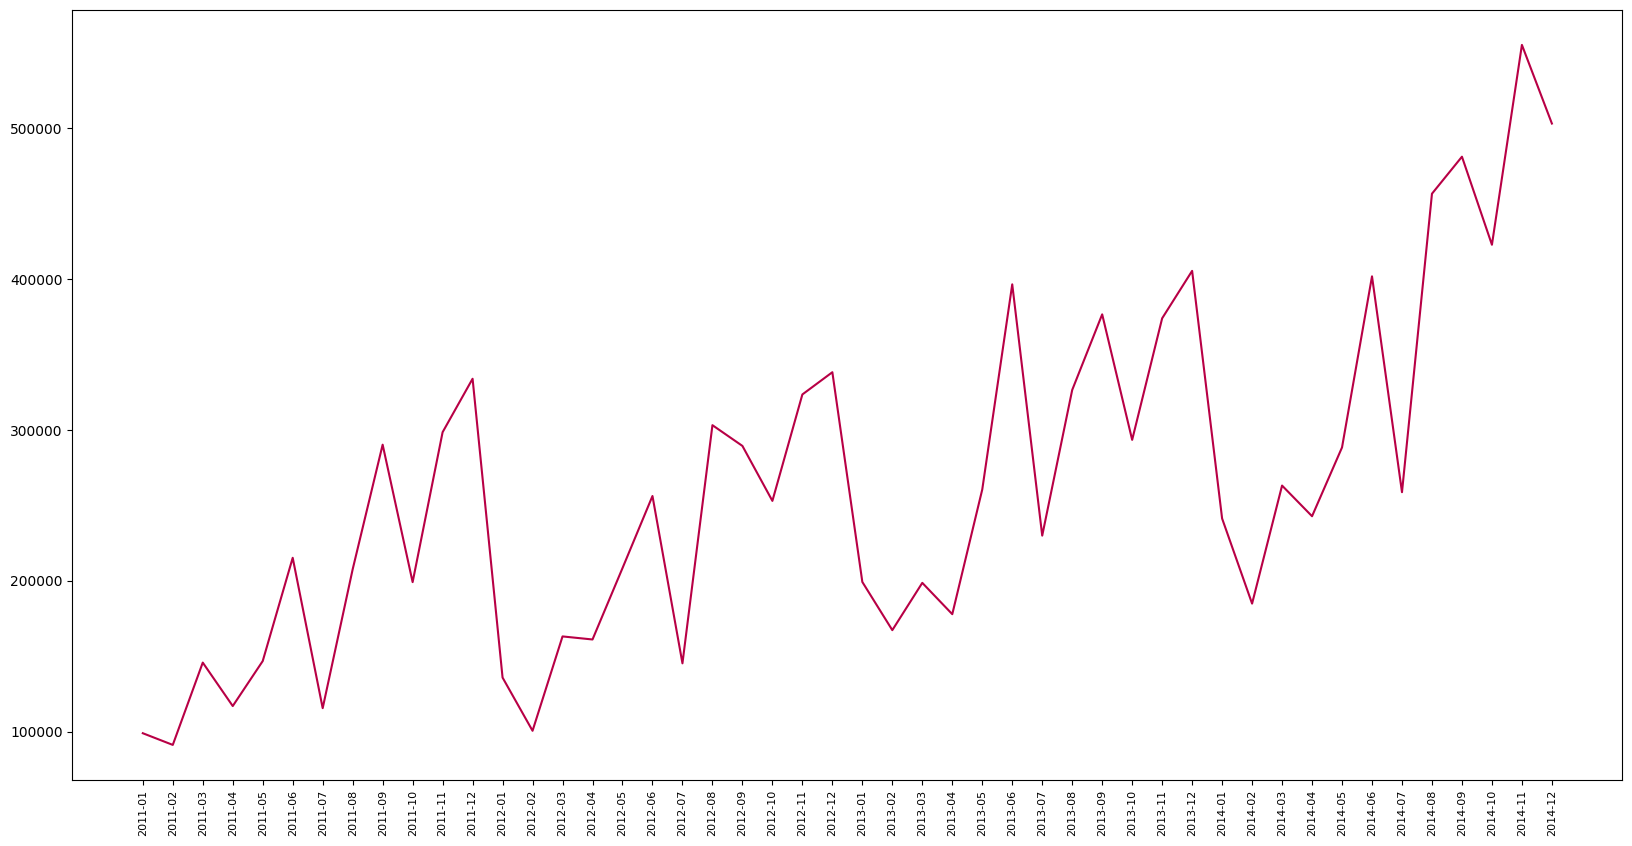

In [7]:
# Setting the figure size
plt.figure(figsize=(20, 10))
plt.plot(superstore_df_monthly_sales['year_month'], superstore_df_monthly_sales['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

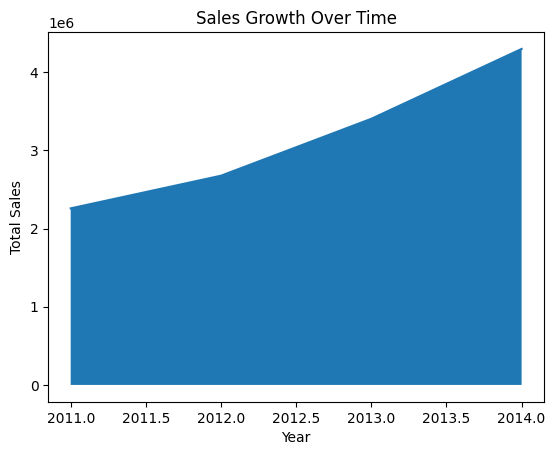

In [8]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_excel("sample_1_percent.xlsx")

# Aggregate sales by year
sales_by_year = superstore_df.groupby('year')['sales'].sum()

# Plot area chart
plt.figure()
plt.fill_between(sales_by_year.index, sales_by_year.values)
plt.plot(sales_by_year.index, sales_by_year.values)

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Growth Over Time")

plt.show()


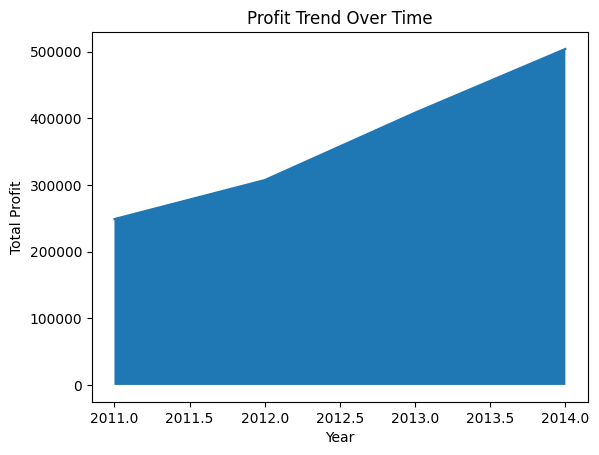

In [9]:
profit_by_year = superstore_df.groupby('year')['profit'].sum()

plt.figure()
plt.fill_between(profit_by_year.index, profit_by_year.values)
plt.plot(profit_by_year.index, profit_by_year.values)

plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Profit Trend Over Time")

plt.show()


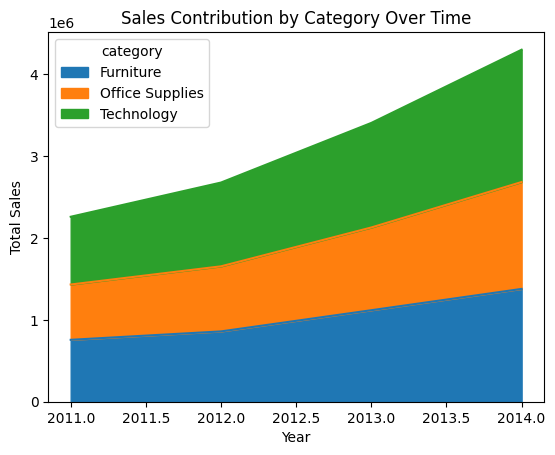

In [10]:
sales_cat_year = superstore_df.pivot_table(
    values='sales',
    index='year',
    columns='category',
    aggfunc='sum'
)

sales_cat_year.plot.area()

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Contribution by Category Over Time")

plt.show()


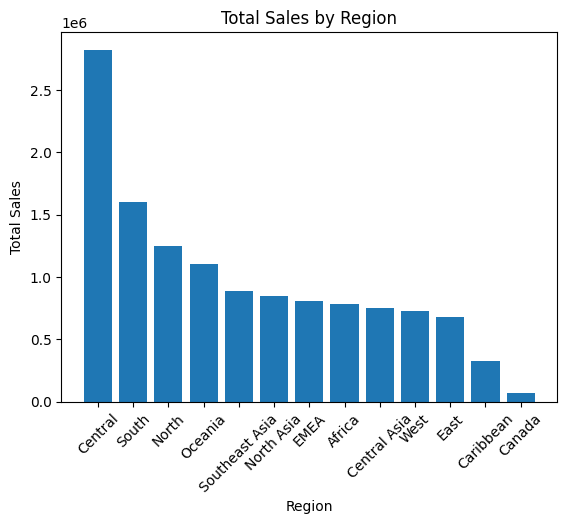

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_excel("sample_1_percent.xlsx")

# Aggregate sales by region
sales_by_region = superstore_df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure()
plt.bar(sales_by_region.index, sales_by_region.values)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)

plt.show()


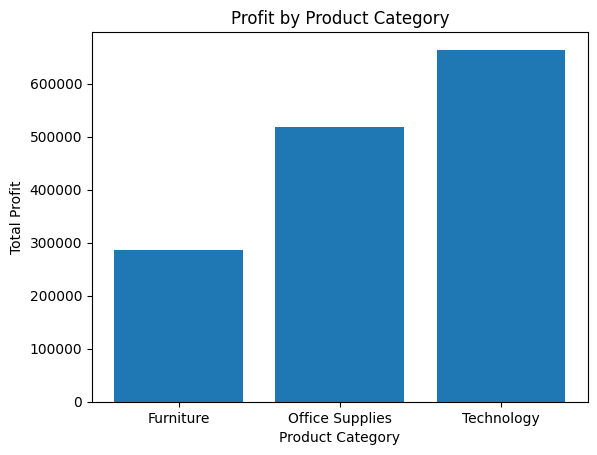

In [ ]:
profit_by_category = superstore_df.groupby('category')['profit'].sum()

plt.figure()
plt.bar(profit_by_category.index, profit_by_category.values)
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.title("Profit by Product Category")

plt.show()


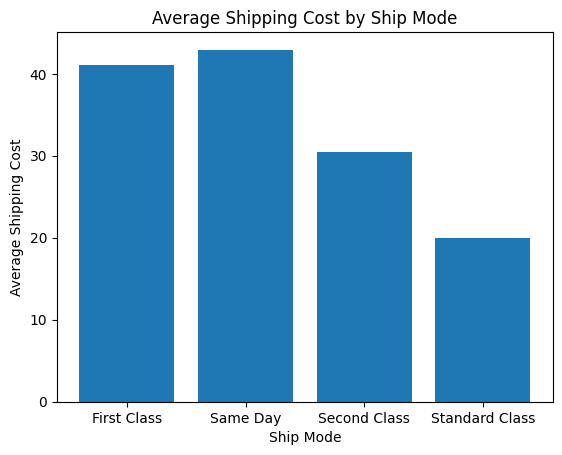

In [ ]:
ship_cost = superstore_df.groupby('ship_mode')['shipping_cost'].mean()

plt.figure()
plt.bar(ship_cost.index, ship_cost.values)
plt.xlabel("Ship Mode")
plt.ylabel("Average Shipping Cost")
plt.title("Average Shipping Cost by Ship Mode")

plt.show()


<Figure size 640x480 with 0 Axes>

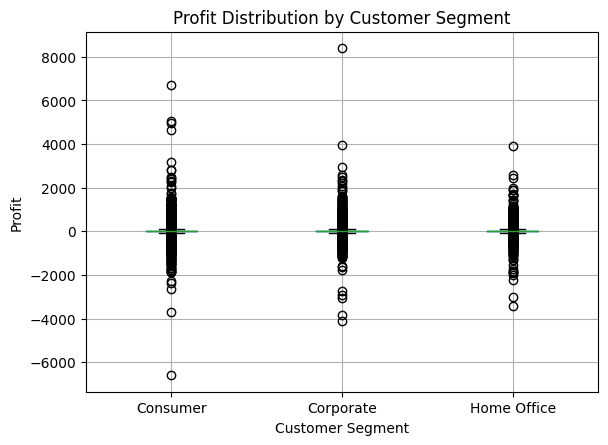

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_excel("sample_1_percent.xlsx")

# Create box plot
plt.figure()
superstore_df.boxplot(column='profit', by='segment')

plt.title("Profit Distribution by Customer Segment")
plt.suptitle("")  # remove default title
plt.xlabel("Customer Segment")
plt.ylabel("Profit")

plt.show()


<Figure size 640x480 with 0 Axes>

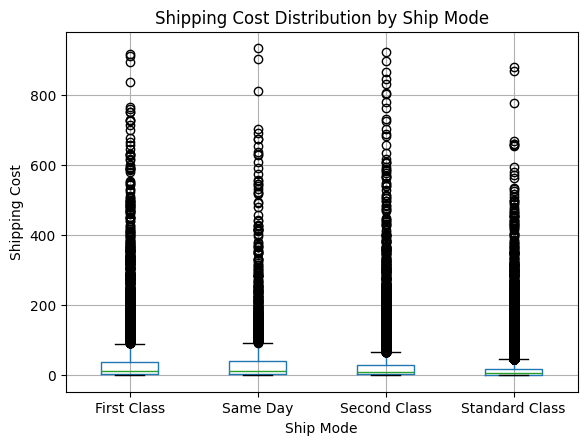

In [ ]:
plt.figure()
superstore_df.boxplot(column='shipping_cost', by='ship_mode')

plt.title("Shipping Cost Distribution by Ship Mode")
plt.suptitle("")
plt.xlabel("Ship Mode")
plt.ylabel("Shipping Cost")

plt.show()


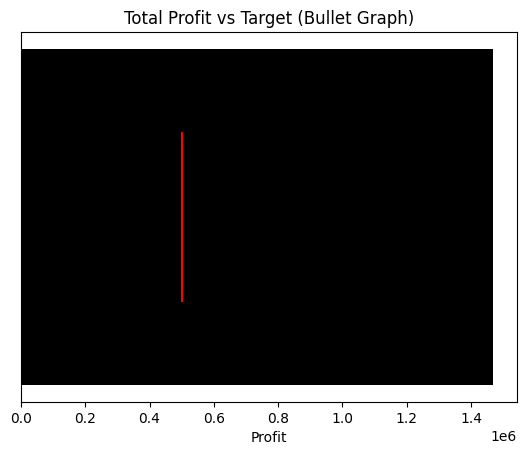

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load data
#df = pd.read_excel("sample_1_percent.xlsx")

# Calculate actual profit
actual_profit = superstore_df['profit'].sum()

# Define target and ranges
target = 500000  # example target
ranges = [300000, 450000, 600000]  # poor, average, good

plt.figure()

# Background performance ranges
plt.barh(0, ranges[2], color='lightgray')
plt.barh(0, ranges[1], color='silver')
plt.barh(0, ranges[0], color='darkgray')

# Actual value
plt.barh(0, actual_profit, color='black')

# Target marker
plt.plot([target, target], [-0.2, 0.2], color='red')

plt.yticks([])
plt.xlabel("Profit")
plt.title("Total Profit vs Target (Bullet Graph)")

plt.show()


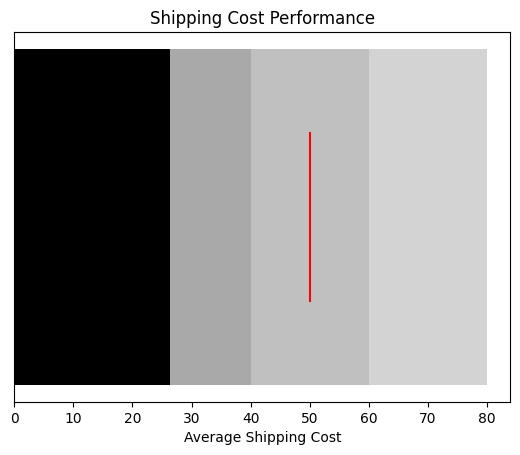

In [ ]:
actual_ship_cost = superstore_df['shipping_cost'].mean()
target_ship_cost = 50

ranges = [40, 60, 80]

plt.figure()

plt.barh(0, ranges[2], color='lightgray')
plt.barh(0, ranges[1], color='silver')
plt.barh(0, ranges[0], color='darkgray')

plt.barh(0, actual_ship_cost, color='black')
plt.plot([target_ship_cost, target_ship_cost], [-0.2, 0.2], color='red')

plt.yticks([])
plt.xlabel("Average Shipping Cost")
plt.title("Shipping Cost Performance")

plt.show()


<h4> QUESTION 2A: WHICH ARE THE TOP 10 PRODUCTS BY SALES (REVENUE)?

In [11]:
# Grouping products by sales
#superstore_df_products_sales = pd.DataFrame(superstore_df.groupby('product_name').sum()['sales'])
superstore_df_products_sales = (superstore_df.groupby('product_name', as_index=False).agg({'sales': 'sum'}))


# Sorting the dataframe in descending order
superstore_df_products_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
superstore_df_products_sales[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


<h4> QUESTION 2B: WHICH ARE THE MOST SELLING PRODUCTS (VOLUME)?

In [12]:
# Grouping products by Quantity
#superstore_df_products_quantity = pd.DataFrame(superstore_df.groupby('product_name').sum()['quantity'])
superstore_df_products_quantity = (superstore_df.groupby('product_name', as_index=False).agg({'quantity': 'sum'}))


# Sorting the dataframe in descending order
superstore_df_products_quantity.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
superstore_df_products_quantity[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


<h4> QUESTION 3: WHAT IS THE MOST PREFERRED SHIP MODE?

By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

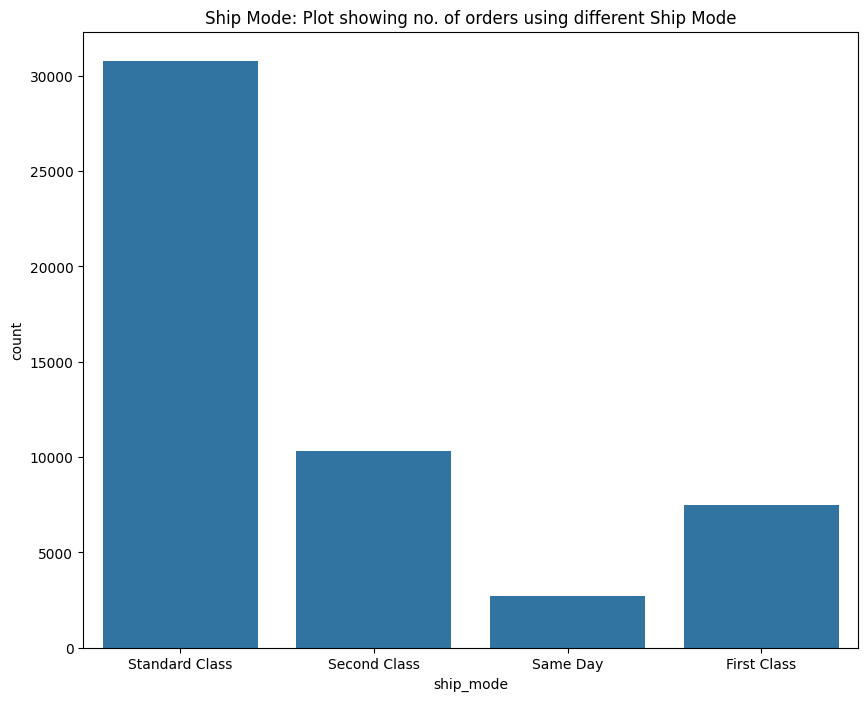

In [13]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=superstore_df)

# Display the figure
plt.title("Ship Mode: Plot showing no. of orders using different Ship Mode")
plt.show()

<H4> QUESTION 4: WHICH CATEGORY IS THE BEST SELLING AND MOST PROFITABLE?

Best Selling means looking at the Sales and Most Profitable is referring to the Profit. We will group the Sales, Profit and also Quantity by Category and run the df.group().sum and pd.DataFrame() functions.

Our observations are:

- All 3 categories — Furniture, Office Supplies and Technology make similar amount of sales.
- Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.
- Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.
- Office Supplies sells the most in terms of quantity as it is relatively cheap product.

In [14]:
# Group sales, profit and quantity by category
superstore_df_category_analysis = pd.DataFrame(superstore_df.groupby(['category'])[['sales', 'profit', 'quantity']].sum().round())
superstore_df_category_analysis

,sales,profit,quantity
category,,,
Furniture,4110874.0,286782.0,34954
Office Supplies,3787070.0,518474.0,108182
Technology,4744557.0,663779.0,35176


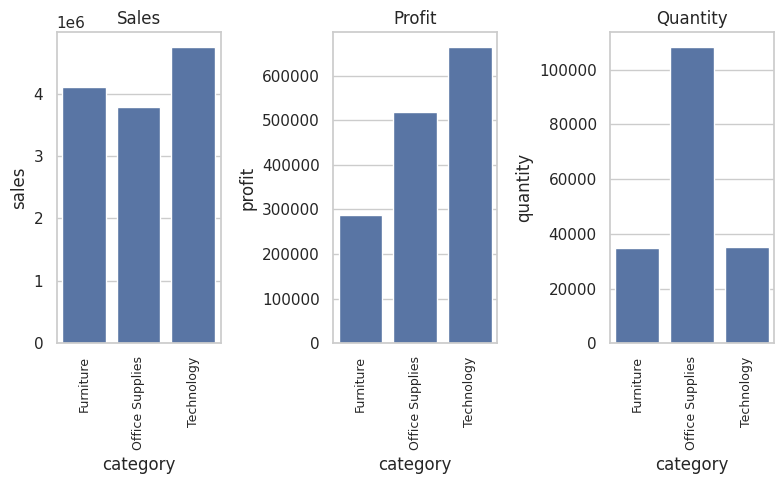

In [15]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
superstore_df_category_sales = sns.barplot(x = superstore_df_category_analysis.index, y = superstore_df_category_analysis.sales, ax=axis[0])
superstore_df_category_profit = sns.barplot(x = superstore_df_category_analysis.index, y = superstore_df_category_analysis.profit, ax=axis[1])
superstore_df_category_quantity = sns.barplot(x = superstore_df_category_analysis.index, y = superstore_df_category_analysis.quantity, ax=axis[2])

# Set titles
superstore_df_category_sales.set(title = 'Sales')
superstore_df_category_profit.set(title = 'Profit')
superstore_df_category_quantity.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(superstore_df_category_sales.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(superstore_df_category_profit.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(superstore_df_category_quantity.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

<h4> QUESTION 5 : WHICH ARE THE BEST SELLING AND MOST PROFITABLE SUB-CATEGORY? WHICH IS THE TOP SELLING SUB-CATEGORY?

<h4> QUESTION 5 A : WHICH ARE THE BEST SELLING AND MOST PROFITABLE SUB-CATEGORY?

Best Selling means looking at the Sales and Most Profitable is referring to the Profit. We will group the Sales, Profit and also Quantity by Category and run the df.group().sum and pd.DataFrame() functions.

In [16]:
# Grouping products by Category and Sub-Category
# superstore_df_sub_category_profit = pd.DataFrame(superstore_df.groupby(['category', 'sub_category']).sum()['profit'].round())
superstore_df_sub_category_profit = (superstore_df.groupby(['category', 'sub_category'], as_index=False).agg({'profit': 'sum'}))

# Sorting the values
# superstore_df_sub_category_profit.sort_values(['category','profit'], ascending=False)
superstore_df_sub_category_profit = (superstore_df_sub_category_profit.sort_values(['category', 'profit'], ascending=[True, False]))

In [17]:
# Group sales, profit and quantity by each category & sub-categories under it
superstore_df_sub_category_analysis = pd.DataFrame(superstore_df.groupby(['category', 'sub_category'])[['sales', 'profit', 'quantity']].sum().round())
superstore_df_sub_category_analysis

sales    profit  quantity
category        sub_category                               
Furniture       Bookcases     1466572.0  161924.0      8310
                Chairs        1501682.0  141974.0     12336
                Furnishings    385578.0   46967.0     11225
                Tables         757042.0  -64083.0      3083
Office Supplies Appliances    1011064.0  141681.0      6078
                Art            372092.0   57954.0     16301
                Binders        461912.0   72450.0     21429
                Envelopes      170904.0   29601.0      8380
                Fasteners       83242.0   11525.0      8390
                Labels          73404.0   15011.0      9322
                Paper          244292.0   59208.0     12822
                Storage       1127086.0  108461.0     16917
                Supplies       243074.0   22583.0      8543
Technology      Accessories    749237.0  129626.0     10946
                Copiers       1509436.0  258568.0      7454
                Machines       779060.0   58868.0      4906
                Phones        1706824.0  216717.0     11870

In [18]:
# Group by sub-category
superstore_df_sub_category_analysis_2 = pd.DataFrame(superstore_df.groupby(['sub_category'])[['sales', 'profit']].sum().round())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(superstore_df_sub_category_analysis_2.sort_values('sales', ascending = False))
#subcat_sales # for all
subcat_sales [:10] #for top 10

,sales,profit
sub_category,,
Phones,1706824.0,216717.0
Copiers,1509436.0,258568.0
Chairs,1501682.0,141974.0
Bookcases,1466572.0,161924.0
Storage,1127086.0,108461.0
Appliances,1011064.0,141681.0
Machines,779060.0,58868.0
Tables,757042.0,-64083.0
Accessories,749237.0,129626.0


In [19]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(superstore_df_sub_category_analysis_2.sort_values('profit', ascending = False))
#subcat_profit # for all
subcat_profit [:10] #for top 10

,sales,profit
sub_category,,
Copiers,1509436.0,258568.0
Phones,1706824.0,216717.0
Bookcases,1466572.0,161924.0
Chairs,1501682.0,141974.0
Appliances,1011064.0,141681.0
Accessories,749237.0,129626.0
Storage,1127086.0,108461.0
Binders,461912.0,72450.0
Paper,244292.0,59208.0


In [20]:
# Sorting the values
superstore_df_sub_category_analysis.sort_values(['category', 'sub_category','quantity'], ascending=False)

sales    profit  quantity
category        sub_category                               
Technology      Phones        1706824.0  216717.0     11870
                Machines       779060.0   58868.0      4906
                Copiers       1509436.0  258568.0      7454
                Accessories    749237.0  129626.0     10946
Office Supplies Supplies       243074.0   22583.0      8543
                Storage       1127086.0  108461.0     16917
                Paper          244292.0   59208.0     12822
                Labels          73404.0   15011.0      9322
                Fasteners       83242.0   11525.0      8390
                Envelopes      170904.0   29601.0      8380
                Binders        461912.0   72450.0     21429
                Art            372092.0   57954.0     16301
                Appliances    1011064.0  141681.0      6078
Furniture       Tables         757042.0  -64083.0      3083
                Furnishings    385578.0   46967.0     11225
                Chairs        1501682.0  141974.0     12336
                Bookcases     1466572.0  161924.0      8310

In [22]:
# Group sales, profit and quantity by category
# superstore_df_sub_category_profit = pd.DataFrame(superstore_df.groupby(['sub_category']).sum()['profit'].round())

superstore_df_sub_category_profit = (
    superstore_df
    .groupby('sub_category', as_index=False)
    .agg(profit=('profit', 'sum'))
    .assign(profit=lambda df: df['profit'].round(0))
)

superstore_df_sub_category_profit

# Sorting the values - for showing all values
# superstore_df_sub_category_profit.sort_values(['profit'], ascending=False)

# All values sorted
superstore_df_sub_category_profit_sorted = (
    superstore_df_sub_category_profit
    .sort_values('profit', ascending=False)
)

# Sorting the values - showing top 10
# superstore_df_sub_category_profit.sort_values(['profit'], ascending=False)[:10]

# Top 10 sub-categories by profit
top_10_sub_categories = superstore_df_sub_category_profit_sorted.head(10)


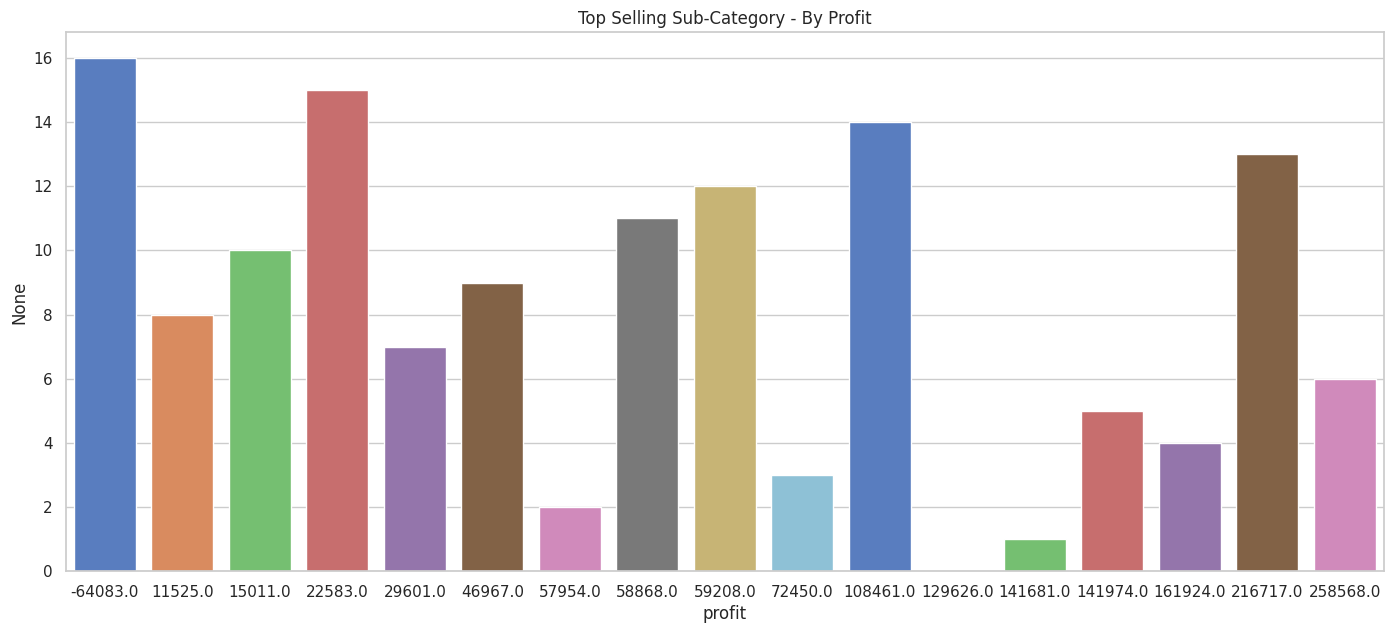

In [23]:
# Plot Bar Plot for Top Selling Sub-Category
plt.figure(figsize=(17, 7))
sns.set_theme(style="whitegrid")
sns.barplot(data = superstore_df_sub_category_profit, y = superstore_df_sub_category_profit.index, x = superstore_df_sub_category_profit.profit, palette = "muted")

# Setting the figure size
plt.title("Top Selling Sub-Category - By Profit")
plt.show()

<h4> QUESTION 5B :  WHICH IS THE TOP SELLING SUB-CATEGORY?

In [26]:
# Group sales, profit and quantity by category
# superstore_df_sub_category_quantity = pd.DataFrame(superstore_df.groupby(['sub_category']).sum()['quantity'].round())
# superstore_df_sub_category_quantity

# Sorting the values - for showing all values
# superstore_df_sub_category_quantity.sort_values(['quantity'], ascending=False)

# Sorting the values - showing top 10
# superstore_df_sub_category_quantity.sort_values(['quantity'], ascending=False)[:10]

# Group and sum quantity by sub_category
superstore_df_sub_category_quantity = (
    superstore_df
    .groupby('sub_category', as_index=False)['quantity']
    .sum()
    .round()
)

# Sort descending
superstore_df_sub_category_quantity = (
    superstore_df_sub_category_quantity
    .sort_values(by='quantity', ascending=False)
)

# Top 10 sub-categories by quantity
top_10 = superstore_df_sub_category_quantity.head(10)

top_10



,sub_category,quantity
3,Binders,21429
14,Storage,16917
2,Art,16301
12,Paper,12822
5,Chairs,12336
13,Phones,11870
9,Furnishings,11225
0,Accessories,10946
10,Labels,9322
15,Supplies,8543


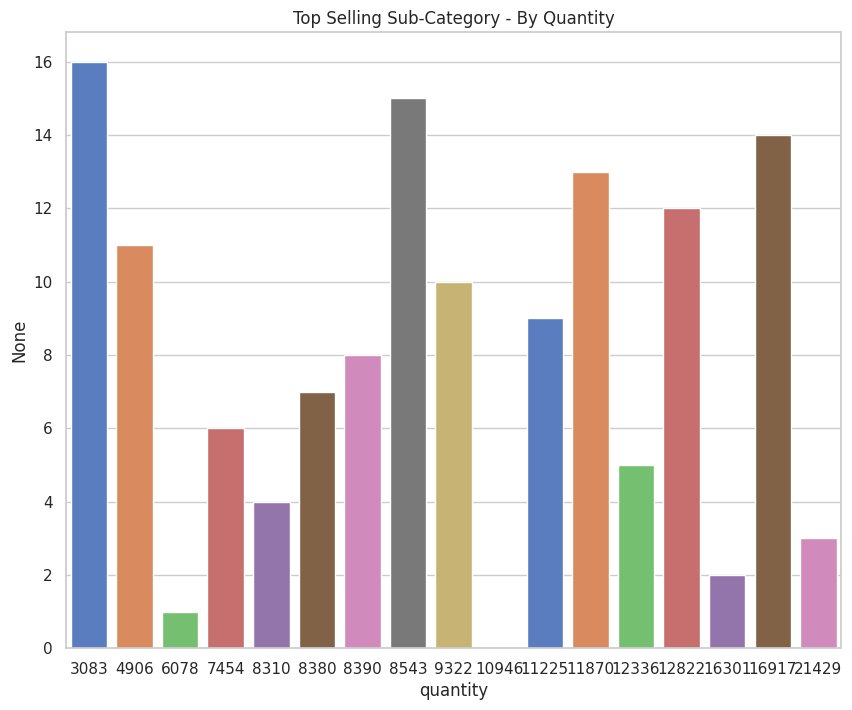

In [27]:
# Plot Bar Plot for Top Selling Sub-Category
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.barplot(data = superstore_df_sub_category_quantity, y = superstore_df_sub_category_quantity.index, x = superstore_df_sub_category_quantity.quantity, palette = "muted")

# Setting the figure size
plt.title("Top Selling Sub-Category - By Quantity")
plt.show()

Here, we can deduce that

Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

In [30]:
# Group sales, profit and quantity by category
# superstore_df_sub_category_sales = pd.DataFrame(superstore_df.groupby(['sub_category']).sum()['sales'].round())
# superstore_df_sub_category_sales

# Sorting the values - showing all values
# superstore_df_sub_category_sales.sort_values(['sales'], ascending=False)

# Sorting the values - showing only top 10
# superstore_df_sub_category_sales.sort_values(['sales'], ascending=False)[:10]

# Group and sum sales by sub_category
superstore_df_sub_category_sales = (
    superstore_df
    .groupby('sub_category', as_index=False)['sales']
    .sum()
    .round()
)

# Sort descending
superstore_df_sub_category_sales = (
    superstore_df_sub_category_sales
    .sort_values(by='sales', ascending=False)
)

# Top 10 sub-categories by sales
top_10_sales = superstore_df_sub_category_sales.head(10)


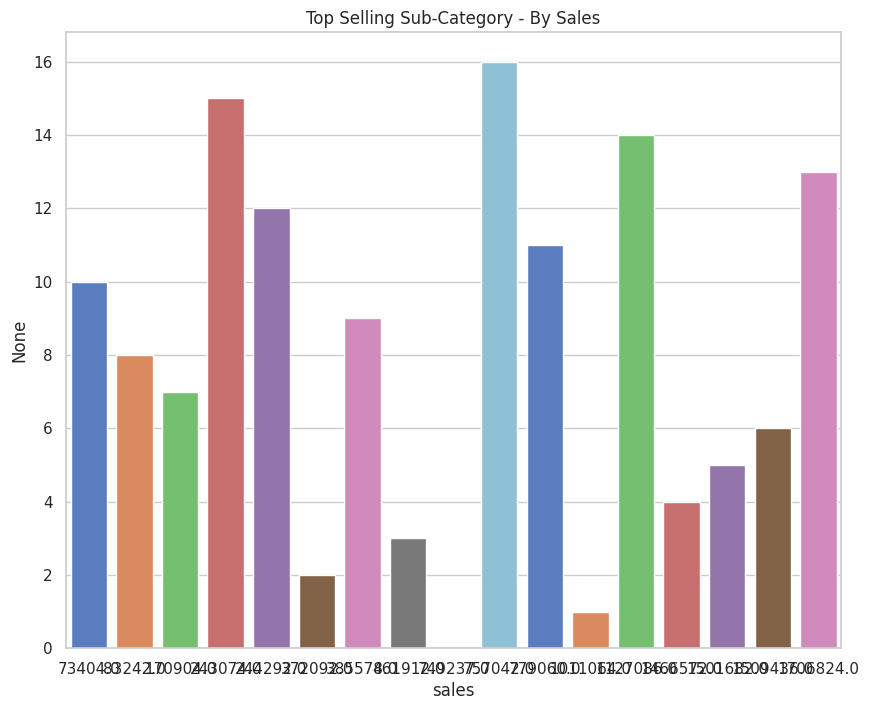

In [31]:
# Plot Bar Plot for Top Selling Sub-Category
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.barplot(data = superstore_df_sub_category_sales, y = superstore_df_sub_category_sales.index, x = superstore_df_sub_category_sales.sales, palette = "muted")

# Setting the figure size
plt.title("Top Selling Sub-Category - By Sales")
plt.show()

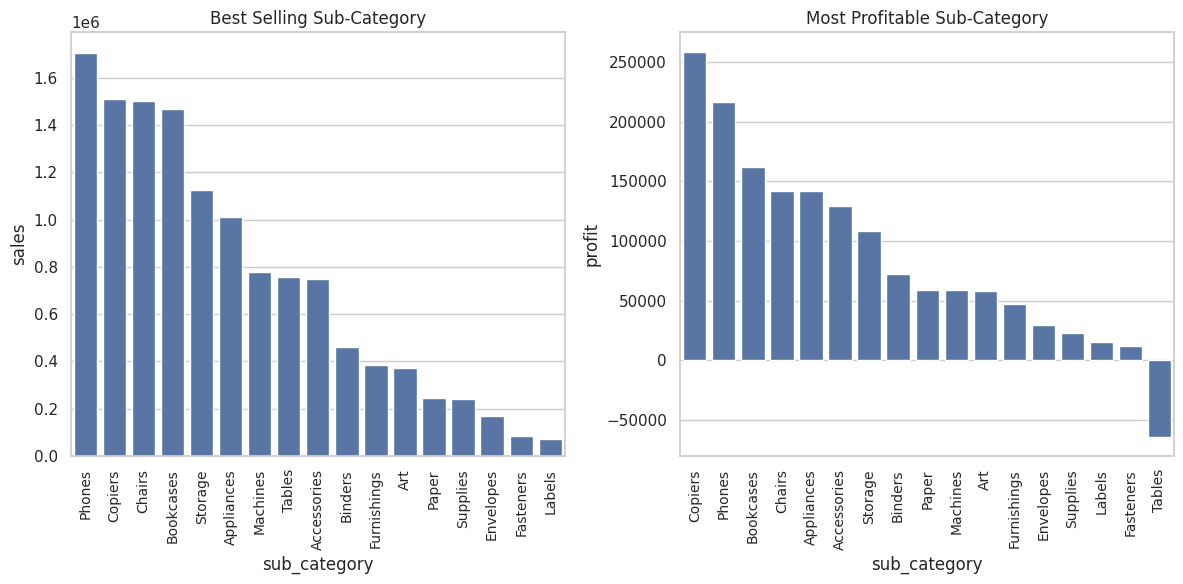

In [32]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

Let’s analyse the bar plots:

Phones and Chairs are Top 2 best selling sub-category.
Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

<H3> Question 6: Which Customer Segment is Most Profitable?

Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

In [33]:
segment_analysis = pd.DataFrame(superstore_df.groupby(['segment'])[['profit']].sum().round())
segment_analysis

,profit
segment,
Consumer,749240.0
Corporate,442786.0
Home Office,277009.0


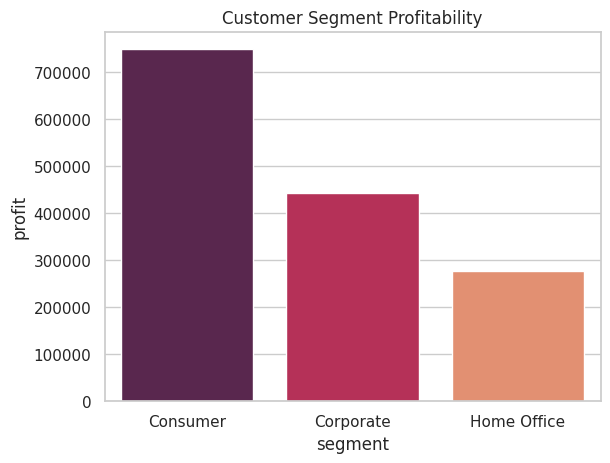

In [34]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

<H3> Question 7: Which region is the most profitable?

Central and North regions are the most profitable.

In [35]:
#region_analysis = pd.DataFrame(superstore_df.groupby(['region'])['profit'].sum().reset_index())
region_analysis = pd.DataFrame(superstore_df.groupby(['region'])['profit'].sum().round())
region_analysis
region_analysis [:10]

,profit
region,
Africa,88872.0
Canada,17817.0
Caribbean,34571.0
Central,311404.0
Central Asia,132480.0
EMEA,43898.0
East,91523.0
North,194598.0
North Asia,165578.0


In [36]:
# Sorting the values - for showing all values
region_analysis.sort_values(['profit'], ascending=False)

# Sorting the values - showing top 10
region_analysis.sort_values(['profit'], ascending=False)[:10]

,profit
region,
Central,311404.0
North,194598.0
North Asia,165578.0
South,140356.0
Central Asia,132480.0
Oceania,121667.0
West,108418.0
East,91523.0
Africa,88872.0


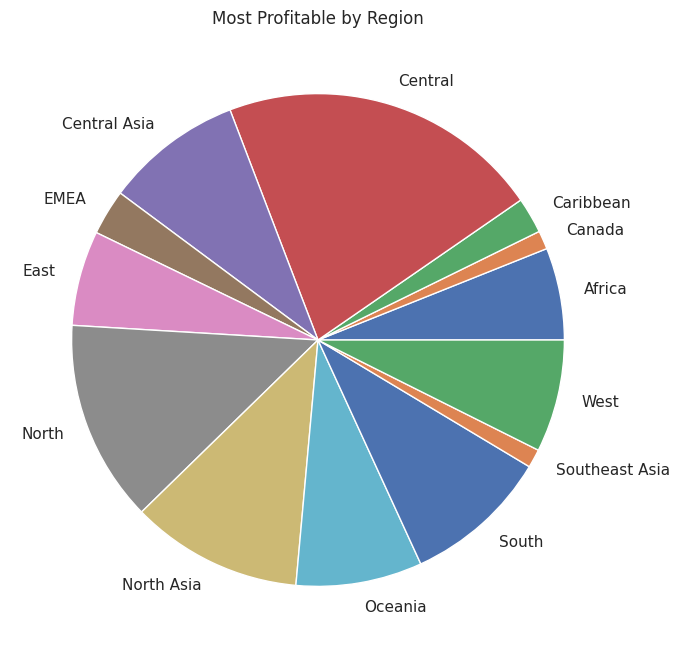

In [37]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# Plot Pie Chart
region_analysis = pd.DataFrame(superstore_df.groupby(['region'])['profit'].sum().reset_index())
plt.pie(region_analysis.profit, labels = region_analysis.region)
plt.title("Most Profitable by Region")
plt.show()

In [38]:
#explode = [0, 0, 0, 0.1] ## this is four but there are 13 regions. how can we make this dynamic input instead of a static one
#plt.pie(region_analysis.profit, labels = region_analysis.region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
#plt.title("Most Profitable by Region")
#plt.show()

<H3> Question 8: Which Country has the Highest Number of Sales

In [40]:
# country_sales = pd.DataFrame(superstore_df.groupby(['country'])['sales', 'quantity'].sum().sort_values('sales',ascending = False))
# top10 =country_sales[:10].round()
# top10

country_sales = (
    superstore_df
    .groupby('country')[['sales', 'quantity']]
    .sum()
    .sort_values(by='sales', ascending=False)
)

top10 = country_sales.head(10).round()

top10

# superstore_df.groupby('country')[['sales','quantity']].sum().sort_values('sales', ascending=False).head(10).round()


,sales,quantity
country,,
United States,2297201.0,37873
Australia,925236.0,10673
France,858931.0,10804
China,700562.0,7081
Germany,628840.0,7745
Mexico,622591.0,10011
India,589650.0,5758
United Kingdom,528576.0,6161
Indonesia,404887.0,5237


In [41]:
bottom10 = country_sales[-10:]
bottom10

,sales,quantity
country,,
Ethiopia,850.620,18
United Arab Emirates,744.120,37
Bahrain,669.180,6
Swaziland,288.030,5
Burundi,267.720,4
Tajikistan,242.784,14
Macedonia,209.640,6
Eritrea,187.740,4
Armenia,156.750,3


In [43]:
# country_quantity = pd.DataFrame(superstore_df.groupby(['country'])['sales', 'quantity'].sum().sort_values('quantity',ascending = False))
# top10 =country_quantity[:10].round()
# top10

country_quantity = (
    superstore_df
    .groupby('country')[['sales', 'quantity']]
    .sum()
    .sort_values(by='quantity', ascending=False)
)

top10 = country_quantity.head(10).round()

top10

# superstore_df.groupby('country')[['sales','quantity']].sum().sort_values('quantity', ascending=False).head(10).round()


,sales,quantity
country,,
United States,2297201.0,37873
France,858931.0,10804
Australia,925236.0,10673
Mexico,622591.0,10011
Germany,628840.0,7745
China,700562.0,7081
United Kingdom,528576.0,6161
Brazil,361106.0,6148
India,589650.0,5758


In [44]:
bottom10 = country_quantity[-10:]
bottom10

,sales,quantity
country,,
Montenegro,4004.37,13
Chad,1317.03,11
Macedonia,209.64,6
Bahrain,669.18,6
Swaziland,288.03,5
South Sudan,1045.62,5
Eritrea,187.74,4
Burundi,267.72,4
Armenia,156.75,3


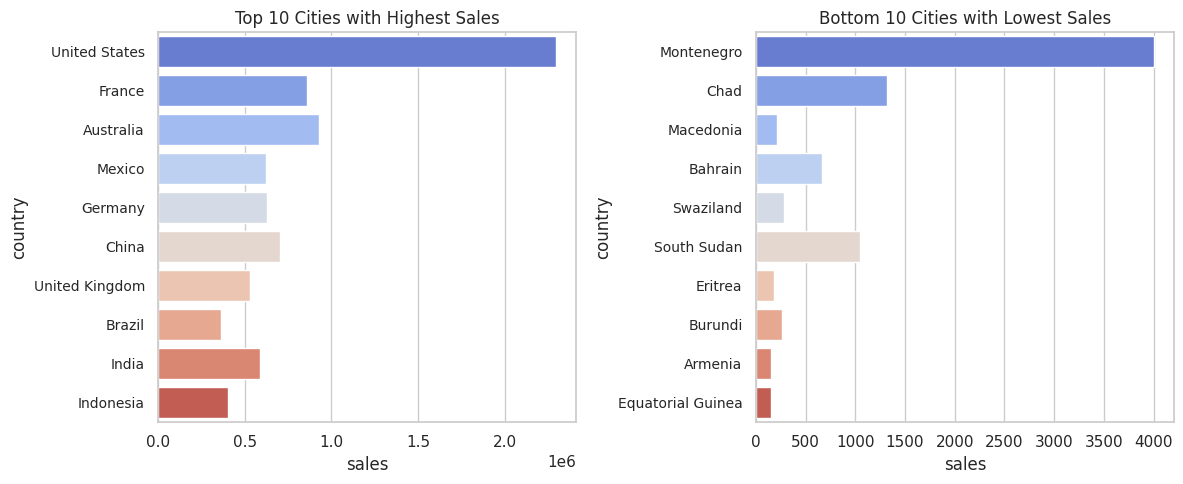

In [45]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.sales, palette = "coolwarm", ax = axis[0])

top10c.set(title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.sales, palette = "coolwarm", ax=axis[1])

bottom10c.set(title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

There is a huge disparity between the countries with highest sales and lowest sales. Marketing strategy has to target the top 10 countries.

<H3> Strategic Recommendation

Here, we revisit our business questions and share with you our high-level business recommendations.

Business Questions

- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?

Recommendations

- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.

<hr style="height:22px;border:none;background-color:black;">

<h1> <left> REFERENCES: SUPER SALES DATA ANALYSIS


<hr style="height:22px;border:none;background-color:black;">



<h3> REFERENCES

1.https://medium.com/clique-org/superstore-sales-use-case-data-analytics-and-visualization-62afacd0777

2.https://medium.com/analytics-vidhya/exploratory-data-analysis-super-store-cb91c37bcb06

In [ ]:
#https://www.kaggle.com/code/imsanjoykb/data-visualization-tutorial-matplotlib-seaborn

<h3> ADVANCED QUESTIONS

In [ ]:
superstore_df.corr()

,sales,quantity,discount,profit,shipping_cost,year,Profit Margin %
sales,1.000000,0.313577,-0.086722,0.485939,0.768073,-0.002905,0.074651
quantity,0.313577,1.000000,-0.019875,0.104743,0.272649,-0.005049,0.050186
discount,-0.086722,-0.019875,1.000000,-0.316375,-0.079055,-0.005894,-0.847359
profit,0.485939,0.104743,-0.316375,1.000000,0.357033,0.002661,0.358016
shipping_cost,0.768073,0.272649,-0.079055,0.357033,1.000000,-0.003137,0.067899
year,-0.002905,-0.005049,-0.005894,0.002661,-0.003137,1.000000,0.006235
Profit Margin %,0.074651,0.050186,-0.847359,0.358016,0.067899,0.006235,1.000000


High +ve correlation signifies a positive relation; as one quantity increases, it implies an increase in the second quantity. High negative correlation signifies that a decrease in one quantity would lead to increase in another. It is important to decide how we would like to use the correlations, whether positively or negatively as both provide notable results.

Looking at the table, we see that Discount and Profit have the highest negative correlation, and as a layman also we can deduce that high discounts mean less profit.

In [ ]:
corr=superstore_df[['quantity','profit','sales']].corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,quantity,profit,sales
quantity,1.000,0.105,0.314
profit,0.105,1.000,0.486
sales,0.314,0.486,1.000


For more insight into positive correlation, let’s take into account quantity, profit and selling price as they seem the ones with higher relations and would be useful to us.

<AxesSubplot:title={'center':'profit vs sales'}, xlabel='profit', ylabel='sales'>

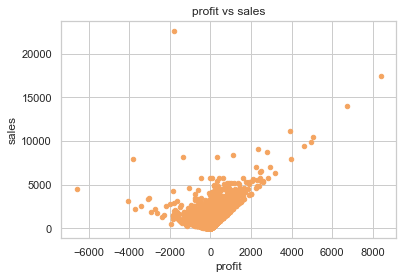

In [ ]:
superstore_df.plot.scatter(x='profit', y='sales', color ='sandybrown', title ='profit vs sales')

The correlation coefficient for Profit and Selling Price is high and that is also seen on the scatterplot. As Selling Price increases, Profit also is higher.

Now according to the attributes and data, we can list down a few use cases like:

- Trend in profit/sales over time (years/months/quarters).
- Trend in profit/sales over region (years/months/quarters).
- Product (Segment/Category) with highest and lowest sales.
- recasting future sales according to shipping date.

These are just examples of what can be done. We can also mix and match these to get more insights into our data.

But as we saw, even a simple scatterplot takes commands we need to remember. To avoid that, we can use Tableau which provides a simple drag and drop interface for visualisations. It is assumed that you’ll be familiar with the working of Tableau. If not, you can find a tutorial for getting started here.